# Setup

In [1]:
from yahoo_historical import Fetcher
from datetime import timedelta, datetime
#from dataclasses import dataclass
from functools import reduce
import pandas as pd
import numpy as np

Setup inline plotting, then override the chart size (in inches).

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

In [3]:
start_date=[2014,1,1]
end_date=[2020,12,28]
# SP500
ticker='%5EGSPC'

In [4]:
raw = Fetcher(ticker, start_date, end_date).get_historical()
data=raw.set_index('Date')
display(data)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,3080600000
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,2774270000
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,3294850000
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,3511750000
2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,1837.489990,3652140000
2014-01-09,1839.000000,1843.229980,1830.380005,1838.130005,1838.130005,3581150000
2014-01-10,1840.060059,1843.150024,1832.430054,1842.369995,1842.369995,3335710000
2014-01-13,1841.260010,1843.449951,1815.520020,1819.199951,1819.199951,3591350000
2014-01-14,1821.359985,1839.260010,1821.359985,1838.880005,1838.880005,3353270000


Need to drop column `Volume` as its value is way larger than that of the other columns it will suppress the other columns when plotting.

In [5]:
data=data.drop(columns=['Volume'])
display(data)

,Open,High,Low,Close,Adj Close
Date,,,,,
2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005
2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,1837.489990
2014-01-09,1839.000000,1843.229980,1830.380005,1838.130005,1838.130005
2014-01-10,1840.060059,1843.150024,1832.430054,1842.369995,1842.369995
2014-01-13,1841.260010,1843.449951,1815.520020,1819.199951,1819.199951
2014-01-14,1821.359985,1839.260010,1821.359985,1838.880005,1838.880005


[rolling](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) creates a rolling window and uses data in the window to do further calculation. The following is to to calculate 50-days moving average closing and assign value to field `SMA`. 

In [6]:
data['SMA'] = data['Close'].rolling(50).mean()
data.head(50)

,Open,High,Low,Close,Adj Close,SMA
Date,,,,,,
2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,NaN
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,NaN
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,NaN
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,NaN
2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,1837.489990,NaN
2014-01-09,1839.000000,1843.229980,1830.380005,1838.130005,1838.130005,NaN
2014-01-10,1840.060059,1843.150024,1832.430054,1842.369995,1842.369995,NaN
2014-01-13,1841.260010,1843.449951,1815.520020,1819.199951,1819.199951,NaN
2014-01-14,1821.359985,1839.260010,1821.359985,1838.880005,1838.880005,NaN


Notice the first 49 days do not have SMA.
Let's plot the first 200 days.

/mnt/data/venv-3.6/lib64/python3.6/site-packages/pandas/plotting/_core.py:394: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

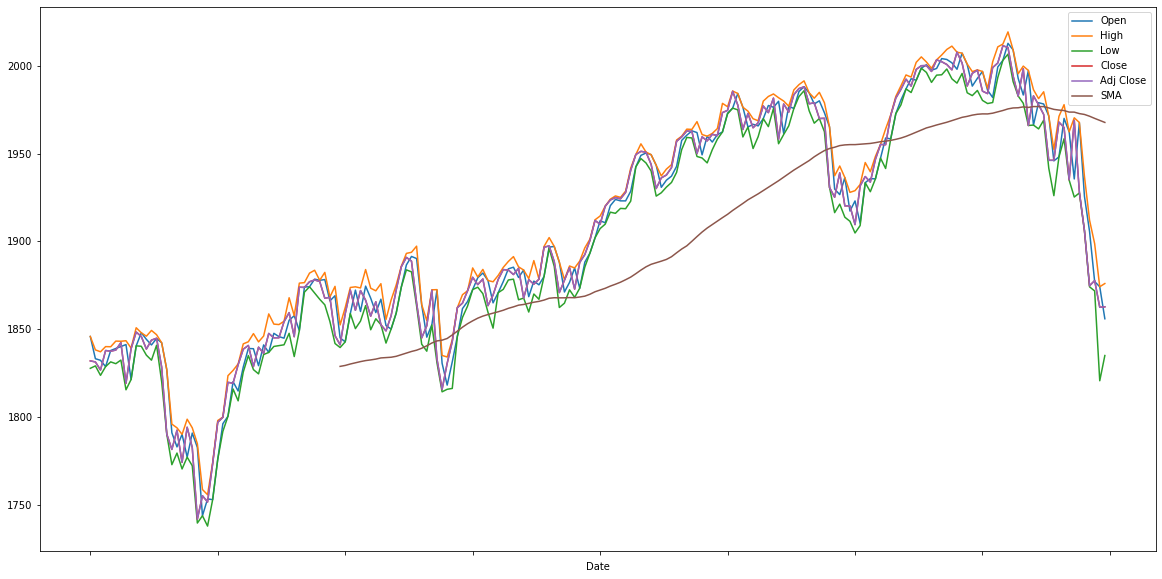

In [7]:
data.head(200).plot()

All data.

/mnt/data/venv-3.6/lib64/python3.6/site-packages/pandas/plotting/_core.py:394: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

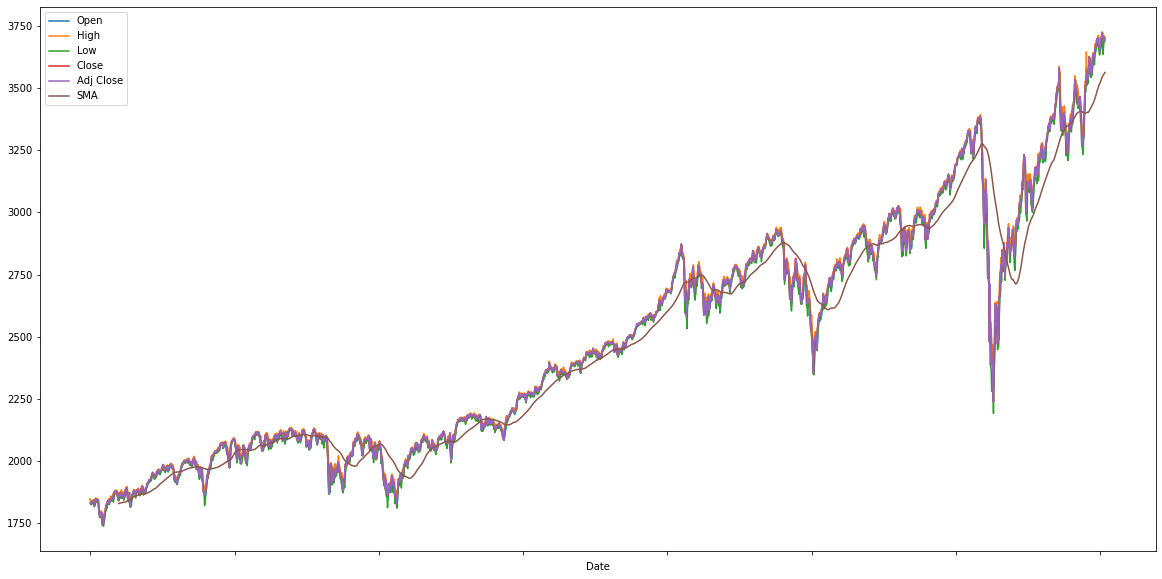

In [8]:
data.plot()

## A simple backtest

This strategy calculates a slow moving average (100-day) and compares it with a fast moving average (50-day). We will long if the faster moving average is above the slower, othewise we are going to be flat.
The following code sets `Position` to 1 if the faster moving average is above the slower one.

In [9]:
data['SMA100'] = data['Close'].rolling(100).mean()
data['Position']=np.where(data['SMA']>data['SMA100'],1,0)
display(data)

,Open,High,Low,Close,Adj Close,SMA,SMA100,Position
Date,,,,,,,,
2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,NaN,NaN,0
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,NaN,NaN,0
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,NaN,NaN,0
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,NaN,NaN,0
2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,1837.489990,NaN,NaN,0
2014-01-09,1839.000000,1843.229980,1830.380005,1838.130005,1838.130005,NaN,NaN,0
2014-01-10,1840.060059,1843.150024,1832.430054,1842.369995,1842.369995,NaN,NaN,0
2014-01-13,1841.260010,1843.449951,1815.520020,1819.199951,1819.199951,NaN,NaN,0
2014-01-14,1821.359985,1839.260010,1821.359985,1838.880005,1838.880005,NaN,NaN,0


Since we are using closing so the actualy trading would happen on the next day, so we should [shift](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html?highlight=shift#pandas.DataFrame.shift) the trade by one day.

In [10]:
data['Position']=data['Position'].shift()

Next we calculate the daily percentage change. Note when `Position` is `1` we long at the previous day closing, so the value change in percentage of the new long position on a `Position==1` day can be calcualted from the [percentage change](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html?highlight=pct_change#pandas.DataFrame.pct_change) of that day's closing to the previous day's closing (buy price).

In [11]:
data['StrategyPct']=data['Close'].pct_change(1) * data['Position']
display(data)

,Open,High,Low,Close,Adj Close,SMA,SMA100,Position,StrategyPct
Date,,,,,,,,,
2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,NaN,NaN,NaN,NaN
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,NaN,NaN,0.0,-0.000000
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,NaN,NaN,0.0,-0.000000
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,NaN,NaN,0.0,0.000000
2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,1837.489990,NaN,NaN,0.0,-0.000000
2014-01-09,1839.000000,1843.229980,1830.380005,1838.130005,1838.130005,NaN,NaN,0.0,0.000000
2014-01-10,1840.060059,1843.150024,1832.430054,1842.369995,1842.369995,NaN,NaN,0.0,0.000000
2014-01-13,1841.260010,1843.449951,1815.520020,1819.199951,1819.199951,NaN,NaN,0.0,-0.000000
2014-01-14,1821.359985,1839.260010,1821.359985,1838.880005,1838.880005,NaN,NaN,0.0,0.000000


Then we accumulate the percentage change, which is the cumulative returns.

In [12]:
data['Strategy']=(data['StrategyPct']+1).cumprod()
display(data)

,Open,High,Low,Close,Adj Close,SMA,SMA100,Position,StrategyPct,Strategy
Date,,,,,,,,,,
2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,NaN,NaN,NaN,NaN,NaN
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,NaN,NaN,0.0,-0.000000,1.000000
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,NaN,NaN,0.0,-0.000000,1.000000
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,NaN,NaN,0.0,0.000000,1.000000
2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,1837.489990,NaN,NaN,0.0,-0.000000,1.000000
2014-01-09,1839.000000,1843.229980,1830.380005,1838.130005,1838.130005,NaN,NaN,0.0,0.000000,1.000000
2014-01-10,1840.060059,1843.150024,1832.430054,1842.369995,1842.369995,NaN,NaN,0.0,0.000000,1.000000
2014-01-13,1841.260010,1843.449951,1815.520020,1819.199951,1819.199951,NaN,NaN,0.0,-0.000000,1.000000
2014-01-14,1821.359985,1839.260010,1821.359985,1838.880005,1838.880005,NaN,NaN,0.0,0.000000,1.000000


/mnt/data/venv-3.6/lib64/python3.6/site-packages/pandas/plotting/_core.py:394: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

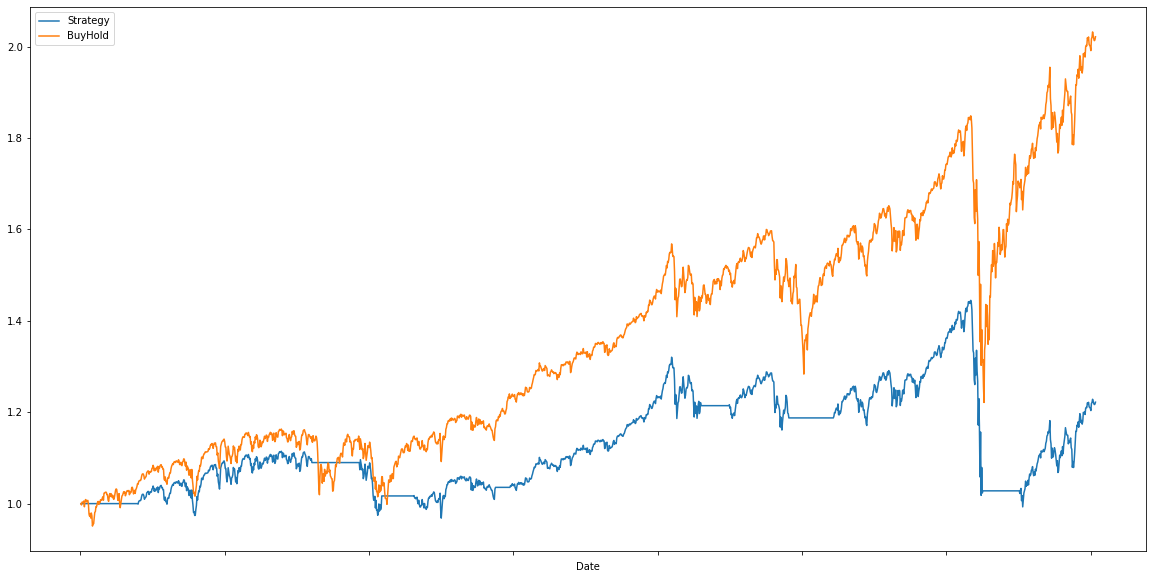

In [13]:
data['BuyHold']=(data['Close'].pct_change(1)+1).cumprod()
data[['Strategy','BuyHold']].plot()

# Making a Correlation Graph

In [16]:
start_date=[2014,1,1]
end_date=[2020,12,28]

def get_hist_data(ticker):
    raw = Fetcher(ticker, start_date, end_date).get_historical()
    return raw.set_index('Date')

SP500='%5EGSPC'
df_sp500 = get_hist_data(SP500)
df_sp500['chg'] = df_sp500['Close'].pct_change()
df_voo = get_hist_data('VOO')
df_sp500['voo_chg'] = df_voo['Close'].pct_change()
display(df_sp500)

,Open,High,Low,Close,Adj Close,Volume,chg,voo_chg
Date,,,,,,,,
2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,3080600000,NaN,NaN
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,2774270000,-0.000333,-0.000895
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,3294850000,-0.002512,-0.002508
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,3511750000,0.006082,0.006225
2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,1837.489990,3652140000,-0.000212,0.000416
2014-01-09,1839.000000,1843.229980,1830.380005,1838.130005,1838.130005,3581150000,0.000348,0.000595
2014-01-10,1840.060059,1843.150024,1832.430054,1842.369995,1842.369995,3335710000,0.002307,0.002318
2014-01-13,1841.260010,1843.449951,1815.520020,1819.199951,1819.199951,3591350000,-0.012576,-0.012688
2014-01-14,1821.359985,1839.260010,1821.359985,1838.880005,1838.880005,3353270000,0.010818,0.010389


/mnt/data/venv-3.6/lib64/python3.6/site-packages/pandas/plotting/_core.py:394: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

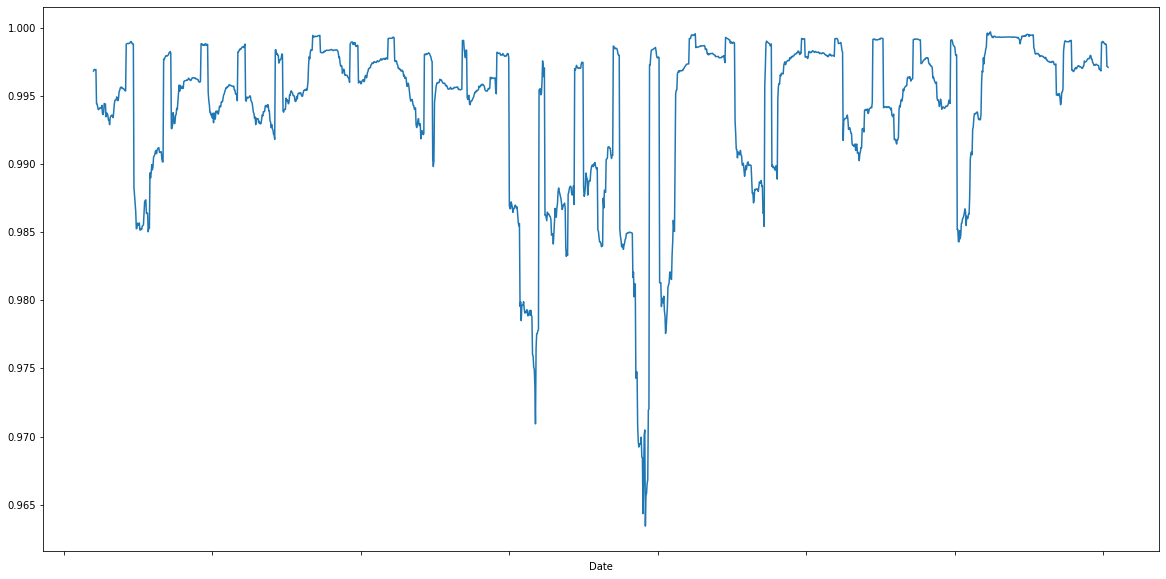

In [17]:
df_sp500['chg'].rolling(50).corr(df_sp500['voo_chg']).plot()

# Backtesting Trading Strategies

## Zipline

To download historical data in zipline:

- Export Quandl API key to enviroment variable `QUANDL_API_KEY`
- Run `zipline ingest -b qaundl` . See [zipline doc](https://www.zipline.io/bundles.html#default-data-bundles).
- Need to rerun to get newer data
- Data is saved under `~/.zipline/data/quandl/`

In [1]:
from zipline import run_algorithm
from zipline.api import order_target_percent,symbol
from datetime import datetime
import pytz
from functools import reduce
import pandas as pd
import numpy as np

# data in docker
import os
os.environ['ZIPLINE_ROOT']='/home/jovyan/work/zipeline-root'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

See [Zipline Beginner Tutorial](https://www.zipline.io/beginner-tutorial.html)

In [16]:
def initialize(context):
    context.stock = symbol('AAPL')
    context.index_average_window = 100

`handle_data()` is called once for each event (see `data_frequency`), note the [data object](https://www.zipline.io/appendix.html#data-object) it passes in.

In [19]:
def handle_data(context, data):
    equities_hist = data.history(context.stock, "close", context.index_average_window, "1d") 
    display(equities_hist)
    print(equities_hist[-1], equities_hist.mean())
    # long if close is above avg, otherwise flat
    stock_weight = 1.0 if equities_hist[-1] > equities_hist.mean() else 0.0
    # place order
    order_target_percent(context.stock, stock_weight)

2017-06-08 00:00:00+00:00    154.384
2017-06-09 00:00:00+00:00    148.397
2017-06-12 00:00:00+00:00    144.752
2017-06-13 00:00:00+00:00    146.017
2017-06-14 00:00:00+00:00    144.592
2017-06-15 00:00:00+00:00    143.726
2017-06-16 00:00:00+00:00    141.713
2017-06-19 00:00:00+00:00    145.768
2017-06-20 00:00:00+00:00    144.443
2017-06-21 00:00:00+00:00    145.299
2017-06-22 00:00:00+00:00    145.060
2017-06-23 00:00:00+00:00    145.778
2017-06-26 00:00:00+00:00    145.250
2017-06-27 00:00:00+00:00    143.178
2017-06-28 00:00:00+00:00    145.260
2017-06-29 00:00:00+00:00    143.118
2017-06-30 00:00:00+00:00    143.457
2017-07-03 00:00:00+00:00    142.939
2017-07-05 00:00:00+00:00    143.526
2017-07-06 00:00:00+00:00    142.172
2017-07-07 00:00:00+00:00    143.616
2017-07-10 00:00:00+00:00    144.493
2017-07-11 00:00:00+00:00    144.961
2017-07-12 00:00:00+00:00    145.170
2017-07-13 00:00:00+00:00    147.192
2017-07-14 00:00:00+00:00    148.457
2017-07-17 00:00:00+00:00    148.975
2

163.05 153.61503030303018


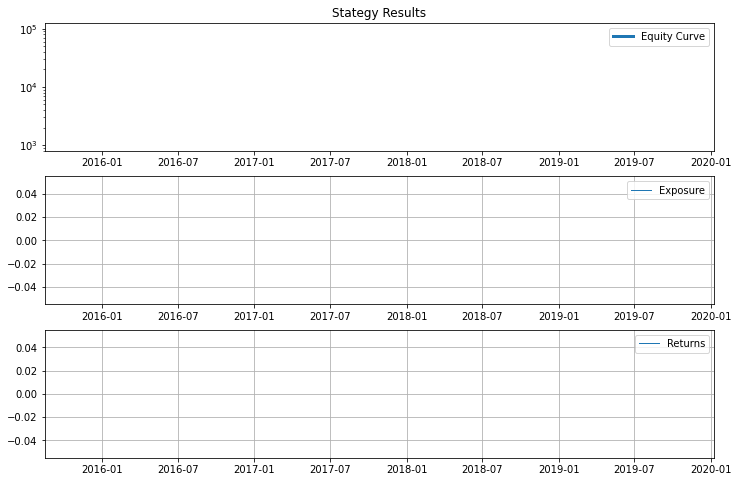

In [20]:
start_date = pd.Timestamp('2017-10-27',tz='UTC')
end_date = pd.Timestamp('2017-10-27',tz='UTC')
results = run_algorithm(
    start = start_date,
    end = end_date,
    initialize = initialize,
    analyze = analyze,
    handle_data = handle_data,
    capital_base = 10000,
    data_frequency = 'daily', bundle='quandl'
)

In [17]:
def analyze(context, perf):
    fig = plt.figure(figsize=(12,8))
    # 1st chart
    ax = fig.add_subplot(311)
    ax.set_title('Stategy Results')
    ax.semilogy(perf['portfolio_value'], linestyle='-', label='Equity Curve', linewidth=3.0)
    ax.legend()
    ax.grid(False)
    
    # 2nd chart
    ax = fig.add_subplot(312)
    ax.plot(perf['gross_leverage'], label='Exposure', linestyle='-', linewidth=1.0)
    ax.legend()
    ax.grid(True)
    
    # 3rd chart
    ax = fig.add_subplot(313)
    ax.plot(perf['returns'], label='Returns', linestyle='-', linewidth=1.0)
    ax.legend()
    ax.grid(True)    

In [6]:
start_date = pd.Timestamp('2003-01-01',tz='UTC')
end_date = pd.Timestamp('2017-12-31',tz='UTC')
start_date

Timestamp('2003-01-01 00:00:00+0000', tz='UTC')

/opt/conda/lib/python3.6/site-packages/empyrical/stats.py:713: RuntimeWarning: invalid value encountered in true_divide
  out=out,
/opt/conda/lib/python3.6/site-packages/empyrical/stats.py:799: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


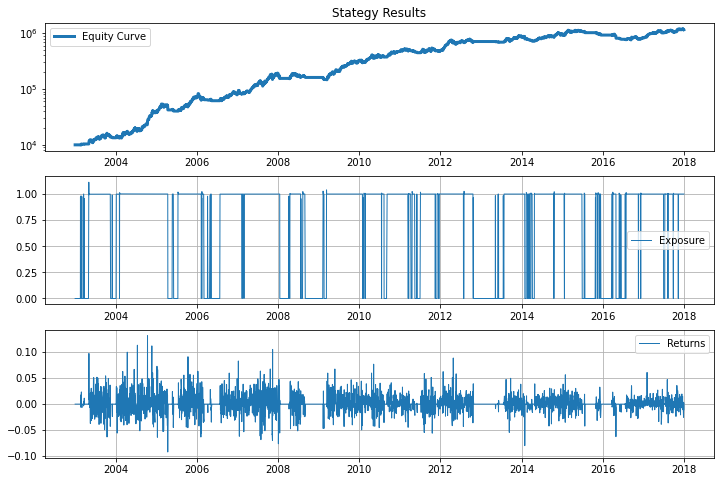

In [7]:
results = run_algorithm(
    start = start_date,
    end = end_date,
    initialize = initialize,
    analyze = analyze,
    handle_data = handle_data,
    capital_base = 10000,
    data_frequency = 'daily', bundle='quandl'
)

In [8]:
display(results)

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2003-01-02 21:00:00+00:00,NaN,0.000000,None,0.0,NaN,None,0.0,10000.00000,0.000,0.000,...,0.0,0.0,0,NaN,10000.00000,0.000,0.000,1,[],0.0
2003-01-03 21:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.0,10000.00000,0.000,0.000,...,0.0,0.0,0,NaN,10000.00000,0.000,0.000,2,[],0.0
2003-01-06 21:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.0,10000.00000,0.000,0.000,...,0.0,0.0,0,NaN,10000.00000,0.000,0.000,3,[],0.0
2003-01-07 21:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.0,10000.00000,0.000,0.000,...,0.0,0.0,0,NaN,10000.00000,0.000,0.000,4,[],0.0
2003-01-08 21:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.0,10000.00000,0.000,0.000,...,0.0,0.0,0,NaN,10000.00000,0.000,0.000,5,[],0.0
2003-01-09 21:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.0,10000.00000,0.000,0.000,...,0.0,0.0,0,NaN,10000.00000,0.000,0.000,6,[],0.0
2003-01-10 21:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.0,10000.00000,0.000,0.000,...,0.0,0.0,0,NaN,10000.00000,0.000,0.000,7,[],0.0
2003-01-13 21:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.0,10000.00000,0.000,0.000,...,0.0,0.0,0,NaN,10000.00000,0.000,0.000,8,[],0.0
2003-01-14 21:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.0,10000.00000,0.000,0.000,...,0.0,0.0,0,NaN,10000.00000,0.000,0.000,9,[],0.0
2003-01-15 21:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.0,10000.00000,0.000,0.000,...,0.0,0.0,0,NaN,10000.00000,0.000,0.000,10,[],0.0


# Backtesting Portfolio

In [9]:
from zipline import run_algorithm
from zipline.api import order_target_percent,symbol
from datetime import datetime
import pytz
from functools import reduce
import pandas as pd
import numpy as np

# data in docker
import os
os.environ['ZIPLINE_ROOT']='/home/jovyan/work/zipeline-root'

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
def initialize(context):
    # Which stock to trade
    dji = [
        "AAPL",
        "AXP",
        "BA",
        "CAT",
        "CSCO",
        "CVX",
        "DIS",
        "DWDP",
        "GS",
        "HD",
        "IBM",
        "INTC",
        "JNJ",
        "JPM",
        "KO",
        "MCD",
        "MMM",
        "MRK",
        "MSFT",
        "NKE",
        "PFE",
        "PG",
        "TRV",
        "UNH",
        "UTX",
        "V",
        "VZ",
        "WBA",
        "WMT",
        "XOM", 
    ]
 

    # Make a list of symbols from the list of tickers
    context.dji_symbols = [symbol(s) for s in dji]
 
    # Moving average window
    context.index_average_window = 100

In [ ]:
def handle_data(context, data):
    # Get history for all the stocks
    stock_hist = data.history(context.dji_symbols, "close", context.index_average_window, "1d")
 

    # Make an empty DataFrame to start with
    stock_analytics = pd.DataFrame()
    
    # Add column for above or below average
    stock_analytics['above_mean'] = stock_hist.iloc[-1] > stock_hist.mean()

 
    # Set weight for stocks to buy
    stock_analytics.loc[stock_analytics['above_mean'] == True, 'weight'] = 1/len(context.dji_symbols)

 
    # Set weight to zero for the rest
    stock_analytics.loc[stock_analytics['above_mean'] == False, 'weight'] = 0.0

 
    # Iterate each row and place trades
    for stock, analytics in stock_analytics.iterrows():
        # Check if the stock can be traded
        if data.can_trade(stock):
            # Place the trade
            order_target_percent(stock, analytics['weight'])